
# Mini-Proyecto de **Regresión** — Base con TODOs (Fish Market)
**Objetivo:** Predecir el **peso** (`Weight`) de los peces a partir de dimensiones físicas.

**Dataset:** *Fish Market* (público).  
URL sugerida: `https://raw.githubusercontent.com/selva86/datasets/master/Fish.csv`

**Modelos a usar (regresión):**
- **KNNRegressor**
- **SVR**
- **DecisionTreeRegressor**
- **RandomForestRegressor**

> ⚠️ Qué debes completar (TODOs):
> 1) **Train/Test split** y **normalización estándar** (cuando aplique).  
> 2) **GridSearchCV** para cada modelo (4), **predicciones** y **métricas** (MSE, MAE, RMSE, MAPE, R²).  
> 3) **Comparativa final** de modelos.
>
> Debajo de cada bloque tienes una **SOLUCIÓN comentada** (`# SOLUCIÓN`) que luego puedes borrar.



## 1) Imports y configuración


In [80]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             mean_absolute_percentage_error, root_mean_squared_error)

# Modelos de regresión (los 4 pedidos)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



## 2) Carga de datos


In [81]:
url = "https://raw.githubusercontent.com/Ankit152/Fish-Market/refs/heads/main/Fish.csv"
df = pd.read_csv(url)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



## 3) EDA mínima


In [82]:
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nNulos por columna:\n", df.isna().sum())
display(df.describe().T)

print("\nClases de 'Species':")
print(df['Species'].value_counts())

Shape: (159, 7)

Tipos:
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Nulos por columna:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142



Clases de 'Species':
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64



## 4) Selección de variables
- **y (target):** `Weight`
- **X (features):** `Length1`, `Length2`, `Length3`, `Height`, `Width`  
(Dejamos fuera `Species` para centrarnos en un flujo de regresión con numéricas.)


In [83]:
target = "Weight"
features = ["Length1", "Length2", "Length3", "Height", "Width"]

X = df[features].copy()
y = df[target].copy()

X.head(), y.head()

(   Length1  Length2  Length3   Height   Width
 0     23.2     25.4     30.0  11.5200  4.0200
 1     24.0     26.3     31.2  12.4800  4.3056
 2     23.9     26.5     31.1  12.3778  4.6961
 3     26.3     29.0     33.5  12.7300  4.4555
 4     26.5     29.0     34.0  12.4440  5.1340,
 0    242.0
 1    290.0
 2    340.0
 3    363.0
 4    430.0
 Name: Weight, dtype: float64)


## 5) **TODO** — Train/Test split + Normalización
1. Divide en train/test (por ejemplo `test_size=0.2`, `random_state=42`).  
2. Aplica **StandardScaler** ajustando SOLO con `X_train` y transformando `X_train` y `X_test`.

> ℹ️ **Nota:** KNN y SVR requieren **escalado** para funcionar bien. Para **DT** y **RF**, usaremos los datos **sin escalar**.


In [84]:
RANDOM_STATE = 77

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

print('Train, 80%', X_train.shape, ' Test, 20%:', X_test.shape)


Train, 80% (127, 5)  Test, 20%: (32, 5)


## PREGUNTAS PARA RESPONDER:

### 1. Aparte del StandardScaler, ¿qué otros tipos de escalado conoces?
Aparte de las estandarización, tambien conocemos el min-max scaler, el robust scaling, las normalizaciones L1 y L2, escalados logaritmicos y cuadraticos y Z-score scaling.
### 2. Que diferencias hay entre ellos?
El man-mix scaler es un escalado donde le restas el valor minimo y divides entre el rango completa. Las normalización L1 y L2 tambien son escalados donde el L1 es la suma de los valores igual a 1 y la L2 la suma de los cuadrados de los valores L2. El robust scaling es como la estandarización pero en vez de la media usa la mediana y en vez de la desviacion estandar usa el rango intercuartil. Los escalados logaritmicos y cuadraticos son aplicarle la función correspondientes. Por ultimo, el Z-score convierte la media a 0 y la desviación a 1.
### 3. ¿Por qué es importante ajustar el escalador solo con los datos de entrenamiento?
Te interesa entrenar solo con los datos de train yq que si usas los de test para entrenar los datos de test influiran en la estandarización, ya que cambian la media y la desviacion estandar.
### 4. Para que sirve la semilla aleatoria? 
La semilla se usa para que los numeros aleatorios sean reproducibles.


## 6) Utilidad para métricas (MSE, MAE, RMSE, MAPE, R²)


In [85]:

def regression_metrics(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    mae = abs_errors.mean()
    mse = (abs_errors**2).mean()
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}


### MAS PREGUNTAS PARA RESPONDER:
#### 1. Que aporta cada metrica?
MSE: La media del error cuadratico <br>
MAE: La media del error en valor absoluto<br>
RMSE: La raiz del error cuadratico, usado para la que las unidades coincidan.<br>
MAPE: Proporcion de la desviación del error.<br>
R²: La proporción de variabilidad de los datos que es capaz de replicar nuestro modelo.
#### 2. Cual es la mas importante?
Por lo general, la métrica mas caracteristica de un modelo es el R², ya que podemos saber que tan bueno es un modelo sin saber a que lo estamos aplicando. Los errores tambien son importantes, para los errores la métricas mas importantes son la MAPE y la RMSE ya que es un error que esta escalado y puedes tener una mejor intuicion sobre su significado.


## 7) Entrenamiento de modelos
Iremos acumulando resultados en una lista `results` para la comparativa final.


In [86]:

results = []



## 7) KNNRegressor

https://www.ibm.com/es-es/think/topics/knn

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.


In [87]:
model = KNeighborsRegressor()


parametros_grid = {
    "n_neighbors": [2, 4, 8, 16],
    "weights": ["uniform", "distance"],
    "p":[1, 2]
}


gs_KNN_error = GridSearchCV(
    estimator=model,
    param_grid=parametros_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs_KNN_error.fit(X_train_scaled, y_train)
print('Mejor RMSE:', round(gs_KNN_error.best_score_, 3))
print('Mejores parametros:', gs_KNN_error.best_params_)

gs_KNN_f1 = GridSearchCV(
    estimator=model,
    param_grid=parametros_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs_KNN_f1.fit(X_train_scaled, y_train)
print('Mejor R²:', gs_KNN_f1.best_score_)
print('Mejores parametros:', gs_KNN_f1.best_params_)




Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejor RMSE: -66.981
Mejores parametros: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejor R²: 0.9492045908415456
Mejores parametros: {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}


In [88]:
best_knnregressor = gs_KNN_error.best_estimator_
y_pred = best_knnregressor.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)
print("KNNRegressor", mets)

results.append({"modelo": "KNNRegressor", **mets})

KNNRegressor {'MAE': np.float64(42.06114555813422), 'MSE': np.float64(9304.987880801234), 'RMSE': np.float64(96.46236510059887), 'MAPE': 0.10947718960732594, 'R2': 0.9554827179206433}


### MAS PREGUNTAS PARA RESPONDER:
#### 1. ¿Que hiperparametros son los más importantes en KNNRegressor?
Los hiperparametros que hemos variado son la cantidad de vecinos, la metrica que define como se miden las distancias y el peso de cada vecino. Por lo general el parametros mas importante o el que mas peso tiene es la cantidad de vecinos.
#### 2. Dice el profe que este modelo realmente no tiene un entrenamiento como tal, ¿a qué se refiere?
No es un entrenamiento como tal porque no es un modelo donde tenga como objetivo tener una ecuacion exacta que predizca y luego optimizarla, es decir, no tiene parametros.
#### 3. ¿que otras distancias aparte de la euclidea conoces? ¿porque pueden ser interesantes? 
La de Minkowski es una metrica general con un parametro p con p=1 y p=2 generaliza la de manhattan y la euclidea, tambien tenemos la distancia cosinoidal que mide la diferencia de direccion.


## 7) SVR

https://www.ibm.com/es-es/think/topics/support-vector-machine

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.


In [89]:
model = SVR()

parametros_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'gamma': ['scale', 'auto']
}

gs_SVR = GridSearchCV(
    estimator=model,
    param_grid=parametros_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs_SVR.fit(X_train_scaled, y_train)
print('Mejor r2 :', gs_SVR.best_score_)
print('Mejores parametros:', gs_SVR.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejor r2 : 0.9150998420152879
Mejores parametros: {'C': 100, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [90]:
best_SVR = gs_SVR.best_estimator_
y_pred = best_SVR.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)
print("SVR", mets)

results.append({"modelo": "SVR", **mets})

SVR {'MAE': np.float64(109.67473503527637), 'MSE': np.float64(81528.92488951843), 'RMSE': np.float64(285.53270371275937), 'MAPE': 0.4238563164737593, 'R2': 0.6099461715128154}


### PREGUNTAS PARA RESPONDER:
#### 1. ¿Qué papel juega el parámetro `C` en SVR?
Este parametro nos indica cuanto penalizamos los errores que han quedado fuera del margen de la regresión.
#### 2. ¿Y el parámetro `epsilon`?
Epsilon indica el grosor del margen alrededor de la regresión los puntos fuera de este margen seran considerados errores y ajustaran nuestro modelo mediante la penalización.
#### 3. ¿Qué diferencias hay entre los kernels `linear`, `poly` y `rbf`?
Es el tipo de relación que tiene la función que estamos ajustando a los datos, linear para una relación lineal, poly para una relacion polinomica y rbf es un tipo de relación donde juntas varias funciones gaussianas radiales.

## 7) DecisionTreeRegressor

https://www.ibm.com/es-es/think/topics/decision-trees

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.

In [91]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

parametros_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4, 6] 
}

gs_DT = GridSearchCV(
    estimator=model,
    param_grid=parametros_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs_DT.fit(X_train_scaled, y_train)
print('Mejor r2:', gs_DT.best_score_)
print('Mejores parametros:', gs_DT.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejor r2: 0.9142591986754747
Mejores parametros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
best_DT = gs_DT.best_estimator_
y_pred = best_DT.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)
print("DecisionTreeRegressor", mets)

results.append({"modelo": "DecisionTreeRegressor", **mets})

DecisionTreeRegressor {'MAE': np.float64(53.341148088023076), 'MSE': np.float64(8332.156089324884), 'RMSE': np.float64(91.28064465879326), 'MAPE': 0.2285375514898264, 'R2': 0.9601369773169693}


### PREGUNTAS PARA RESPONDER:
#### 1.- El profe dice que los árboles no necesitan escalado, ¿por qué?
A la hora de comparar datos el rango de estos da igual ya que no estas haciendo calculos que pueda ser afectado por el escalado. 
#### 2.- ¿Qué papel juega el parámetro `max_depth`?
Este parametro indica cuantas divisiones va a tener como maximo el arbol, en el caso de None no tiene limite por lo que hara divisiones hasta haya un probable overfitting.

## 7) RandomForestRegressor

https://www.ibm.com/es-es/think/topics/random-forest

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.

In [93]:
model = RandomForestRegressor(random_state=42)

parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]}

gs_RF = GridSearchCV(
    estimator=model,
    param_grid=parametros_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs_RF.fit(X_train_scaled, y_train)
print('Mejor r2:', gs_RF.best_score_)
print('Mejores parametros:', gs_RF.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor r2: 0.9467991967106156
Mejores parametros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [94]:
best_RF = gs_RF.best_estimator_
y_pred = best_RF.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)
print("RandomForestRegressor", mets)

results.append({"modelo": "RandomForestRegressor", **mets})

RandomForestRegressor {'MAE': np.float64(47.77391666666666), 'MSE': np.float64(10465.348459954423), 'RMSE': np.float64(102.30028572762846), 'MAPE': 0.13852446583087222, 'R2': 0.94993127606197}


### PREGUNTAS PARA RESPONDER:
#### 1. ¿por que 100 o 200 o 500 arboles son mejor que 1?
En este modelo cada arbol es un subconjunto de todos los datos. Coger muchos subconjuntos aleatoriamente te puede ayudar a que haya baja correlación entre árboles de esta forma se evitan sesgos y overfittings, con solo una muestra estarias cayendo en la "subjetividad" que tiene la totalidad de los datos por lo que perderías variabilidad en las decisiones.
#### 2. ¿Qué condicion deben cumplir los arboles para que el conjunto funcione bien?
Lo ideal sería que la correlación entre árboles fuera la mínima posible, pero que dentro de cada arbol tuvieramos la maxima variabilidad.


## 8) **TODO** — Comparativa final
Ordena por **RMSE** (menor es mejor) y/o muestra todas las métricas.


In [95]:
df_res = pd.DataFrame(results).sort_values(by="RMSE", ascending = True)
display(df_res)


,modelo,MAE,MSE,RMSE,MAPE,R2
2,DecisionTreeRegressor,53.341148,8332.156089,91.280645,0.228538,0.960137
0,KNNRegressor,42.061146,9304.987881,96.462365,0.109477,0.955483
3,RandomForestRegressor,47.773917,10465.348460,102.300286,0.138524,0.949931
1,SVR,109.674735,81528.924890,285.532704,0.423856,0.609946


## 9) Comenta la jugada

### 1) Hablame de que significa cada metrica, que historia cuenta cada metrica en conjunto, como comparan unas metricas con otras.
MAE: Es la media de del valor absoluto de la diferencia entre lo predicho y lo real (error). Te dice el error medio tal cual estan en los datos(sin maquillar).

MSE: Es la media  de los cuadrados de los errores. Te dice cual es la varianza residual, es decir, la variabilidad en los datos que un modelo no logra explicar.

RMSE: Es la raiz de los cuadrados de los errores. Se aplica la raiz para que las unidades sean iguales que en los datos, tambien mide la desviacion estandar de los residuos, es decir como lejos suelen estar los puntos de la regresión.

MAPE: Es el error medio de la prediccion expresado en porcentajes, esto se consigue dividiendo cada error por el valor real y multiplicando por 100.

R2: Representa la proporcions de variabilidad que puede replicar nuestro modelo con respecto a los datos. En otras palabras, nos cuenta cuanto de la variable que queremos predecir es se debe al modelo y cuanto se nos escapa.

Como compararlas: Para empezar no podemos comparar todas entre si, ya que no todos tienen las mismas unidades, por ejemplo MAE y RMSE se pueden comparar ya que estan en las unidades de los datos, por lo general RMSE es mas importante que MAE. MAPE es util para comparar diferentes datasets con diferentes escalas, MSE tiene las unidades al cuadrado por lo que no podemos compararlo con ninguna otra métrica. Por ultimo, R2 no mide el error en sí sino que la calidad del modelo por lo que no es recomendable compararlo con el resto de las métricas.
### 2) Que modelo es mejor y por qué. 
El mejor modelo es el KNNRegressor, aunque el decision tree tenga mejor R2, cuando vemos la metrica de MAPE el porcetaje de error del KNN es del 10% y la del decision tree 20% es decir mas del 200%, en cambio la diferencia en R2 es de menos 0,5%, en el resto de metricas la diferencia es menos significativa y sería algo mas subjetivo. El modelo de random forest es un poco peor que la KNN en todas las metricas, y la de SVR es practicamente despreciable dadas las metricas.
### 3) Que otras coonsideraciones podriamos tener en cuenta a la hora de elegir el modelo mas alla de las metricas.
Otra de las "metricas" que conocemos es el estadístico de Cp de Mallows. El estadístico C_p de Mallows sirve para comparar modelos con distintos predictores y elegir el más adecuado. La regla es que el mejor modelo tendrá un Cp cercano a p+1(numero de predictores mas el interceptor): si es mucho mayor, indica sesgo o falta de variables (underfitting), y si es mucho menor, sugiere que el modelo está incluyendo variables innecesarias (overfitting). Nos ayuda ha encontrar el equilibrio entre simplicidad y precisión. Realmente no hemos trabajo casi nada este estadistico asi que no puedo explicar mas.

### 4) Que info util nos ofrecen los modelos entrenados. 
Nos dan mucha informacion. Para empezar podemos hacer predicciones del peso de los peces a partir de las dimensiones. Tambien gracias a los modelos podemos saber que variables son mas importantes para predecir el peso, por ejemplo, es mejor indicador la anchura que la longitud. Tambien podemos saber las metricas lo que nos ayuda a entender como de buenos son los modelos y compararlos entre si, amentando asi nuestro entendimiento sobre el funcionamiento de los modelos usados.


## 10) Extensiones
- Añadir `Species` con One-Hot Encoding y comparar.
- Que columnas podriamos crear/eliminar... feature engineering?
- Sabrias dibujar un decission tree?



In [96]:
df_con_especies = pd.get_dummies(df, columns=['Species'])
df_con_especies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [97]:
features_ohe = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 
                'Species_Parkki', 'Species_Perch', 'Species_Pike', 
                'Species_Roach', 'Species_Smelt', 'Species_Whitefish']
target = "Weight"

X_ohe = df_con_especies[features_ohe]
y_ohe = df_con_especies[target]

# Train/test split
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.2, random_state=77
)

# Escalado estándar
scaler_ohe = StandardScaler()
X_train_ohe_scaled = scaler_ohe.fit_transform(X_train_ohe)
X_test_ohe_scaled = scaler_ohe.transform(X_test_ohe)


results_ohe = []

# KNN
knn_ohe = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_ohe.fit(X_train_ohe_scaled, y_train_ohe)
y_pred_knn = knn_ohe.predict(X_test_ohe_scaled)
mets_knn = regression_metrics(y_test_ohe, y_pred_knn)
results_ohe.append({"modelo": "KNNRegressor", **mets_knn})

# SVR
svr_ohe = SVR(C=100, epsilon=1, gamma='auto')
svr_ohe.fit(X_train_ohe_scaled, y_train_ohe)
y_pred_svr = svr_ohe.predict(X_test_ohe_scaled)
mets_svr = regression_metrics(y_test_ohe, y_pred_svr)
results_ohe.append({"modelo": "SVR", **mets_svr})

# Decision Tree
dt_ohe = DecisionTreeRegressor(max_depth=5, random_state=77)
dt_ohe.fit(X_train_ohe_scaled, y_train_ohe)
y_pred_dt = dt_ohe.predict(X_test_ohe_scaled)
mets_dt = regression_metrics(y_test_ohe, y_pred_dt)
results_ohe.append({"modelo": "DecisionTreeRegressor", **mets_dt})

# Random Forest
rf_ohe = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
rf_ohe.fit(X_train_ohe_scaled, y_train_ohe)
y_pred_rf = rf_ohe.predict(X_test_ohe_scaled)
mets_rf = regression_metrics(y_test_ohe, y_pred_rf)
results_ohe.append({"modelo": "RandomForestRegressor", **mets_rf})

# Tabla de resultados
df_res_ohe = pd.DataFrame(results_ohe).sort_values(by="RMSE", ascending=True)
display(df_res_ohe)

,modelo,MAE,MSE,RMSE,MAPE,R2
0,KNNRegressor,39.103686,7712.586762,87.821334,0.381188,0.963101
3,RandomForestRegressor,47.288892,10262.390429,101.303457,0.179201,0.950902
2,DecisionTreeRegressor,84.849617,30779.700492,175.441445,0.352440,0.852743
1,SVR,123.077158,85601.925252,292.578067,0.728183,0.590460


En este caso el mejor modelo es el random forest, pero estas métricas no estoy seguro hasta que punto son fiables por que tener mas columnas con el one hot encoding puede no tener correlaciñon con el peso y solo estariamos empeorando los modelos de predicción que comparando las métricas con el dataset sin los nombres es lo mas probable.

Para el feature engineering podemos usar varios metodos. Para la creacion de columnas podemos crear columnas haciendo conbinaciones entre las que ya hay o podemos transformarlas las que ya hay. Para eliminar columnas podemos ver la correlación entre features con un heatmap o con el decision tree y eliminar los que esten por debajo de una tolerancia de correlación.

Si, sabría dibujarlo a mano si es a lo que te refieres, sino el codigo esta abajo.

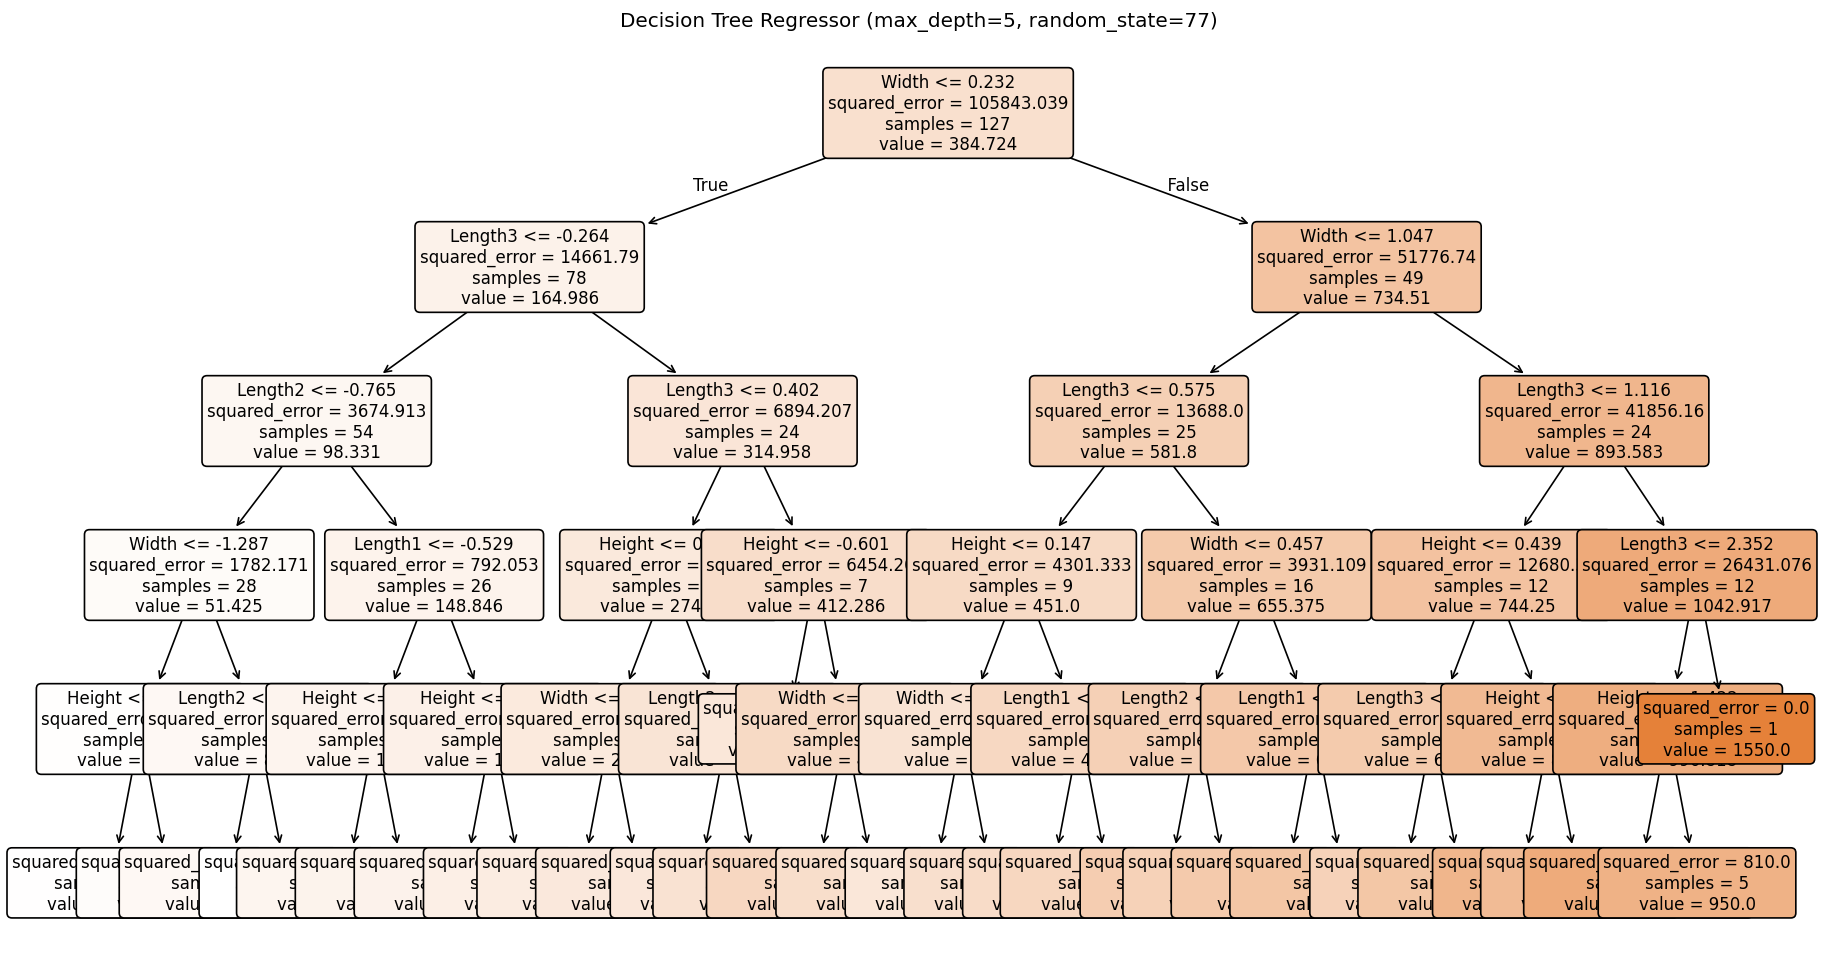

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(18, 10), dpi=120)
plot_tree(
    best_DT,
    feature_names=features,
    filled=True,          # colorea por valor
    rounded=True,         # nodos con bordes redondeados
    fontsize=10
)
plt.title("Decision Tree Regressor (max_depth=5, random_state=77)")
plt.show()